In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Prepare Dataset

In [4]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

df = df[base]

In [5]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


## EDA

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

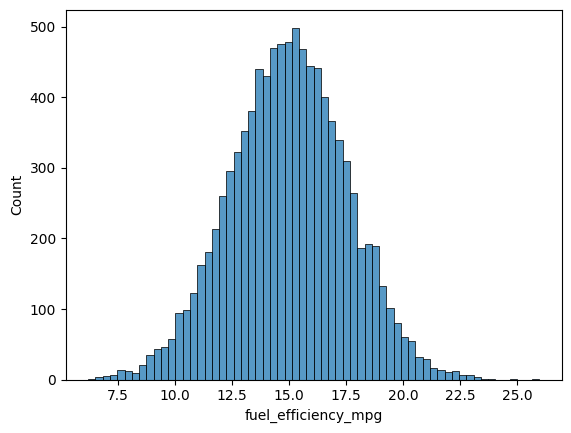

In [6]:
import seaborn as sns
sns.histplot(df.fuel_efficiency_mpg)

No Long tail


## Question 1
There's one column with missing values. What is it?

In [7]:
df.isnull().any()

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

## Question 2
What's the median (50% percentile) for variable 'horsepower'?

In [8]:
float(df.horsepower.median())

149.0

In [9]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [10]:
n,n_val,n_test,n_train

(9704, 1940, 1940, 5824)

In [11]:
df_train = df.iloc[: n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [12]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,210,136.0,3001.227490,2004,14.272374
1,290,142.0,3190.590332,2010,14.562889
2,240,120.0,3518.444921,2008,11.872658
3,220,141.0,1909.631801,2015,19.731391
4,170,114.0,3825.442821,2009,10.344815
...,...,...,...,...,...
1935,140,164.0,2981.107371,2013,15.101802
1936,180,154.0,2439.525729,2004,17.962326
1937,220,138.0,2583.471318,2008,17.186587
1938,230,177.0,2905.527390,2011,15.331551


In [15]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [16]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [17]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,170,159.0,3413.433759,2003
1,130,97.0,3149.664934,2007
2,170,78.0,3079.038997,2018
3,220,NaN,2542.392402,2009
4,210,140.0,3460.870990,2009
...,...,...,...,...
5819,160,156.0,2990.334203,2020
5820,240,105.0,3495.100812,2014
5821,210,171.0,3434.252180,2011
5822,180,172.0,2967.708852,2018


In [18]:
df_train.isnull().any()

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
dtype: bool

## Question 3

In [19]:
#filling with 0 and mean

def prepare_X_fill_0(df):
    df = df.fillna(0)
    X = df.values
    return X

def prepare_X_fill_mean(df):
    df_train_copy = df_train.copy()
    df = df.fillna(df_train_copy["horsepower"].mean())
    X = df.values
    return X


In [20]:
X_train_fill_0 = prepare_X_fill_0(df_train)

In [21]:
X_train_fill_0

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ],
       ...,
       [ 210.        ,  171.        , 3434.25218007, 2011.        ],
       [ 180.        ,  172.        , 2967.7088516 , 2018.        ],
       [ 180.        ,  152.        , 2483.54452032, 2014.        ]],
      shape=(5824, 4))

In [22]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [23]:
w0, w = train_linear_regression(X_train_fill_0, y_train)

In [24]:
y_pred = w0 + X_train_fill_0.dot(w)

<Axes: ylabel='Count'>

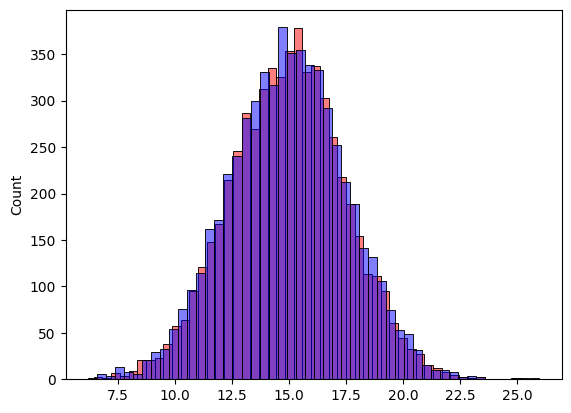

In [25]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [26]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

np.float64(0.5222357953718754)

In [27]:
X_train_fill_mean = prepare_X_fill_mean(df_train)

In [28]:
X_train_fill_mean

array([[ 170.        ,  159.        , 3413.43375861, 2003.        ],
       [ 130.        ,   97.        , 3149.66493422, 2007.        ],
       [ 170.        ,   78.        , 3079.03899737, 2018.        ],
       ...,
       [ 210.        ,  171.        , 3434.25218007, 2011.        ],
       [ 180.        ,  172.        , 2967.7088516 , 2018.        ],
       [ 180.        ,  152.        , 2483.54452032, 2014.        ]],
      shape=(5824, 4))

In [29]:
w0, w = train_linear_regression(X_train_fill_mean, y_train)

In [30]:
y_pred = w0 + X_train_fill_mean.dot(w)

<Axes: ylabel='Count'>

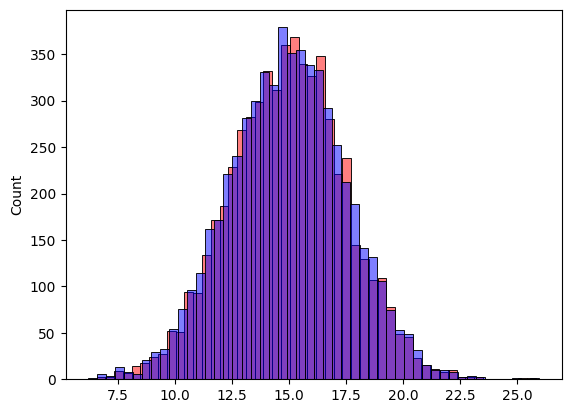

In [31]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [32]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

np.float64(0.4657139642090197)

## Validating the model

In [33]:
X_train_fill_0 = prepare_X_fill_0(df_train)
w0, w = train_linear_regression(X_train_fill_0, y_train)


X_val = prepare_X_fill_0(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5170704486850991)

In [34]:
X_train_fill_mean = prepare_X_fill_mean(df_train)
w0, w = train_linear_regression(X_train_fill_mean, y_train)

X_val = prepare_X_fill_mean(df_val)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.46092708133255383)